In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.linalg import norm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
CRITICAL_VALUE = 0.04301

In [3]:
def get_empirical_data(data, xs):
    emp_data = np.empty_like(xs)
    
    for i, x in enumerate(xs):
        emp_data[i] = np.count_nonzero(data <= x)
    
    return emp_data / data.shape[0]

In [4]:
def compare_data(xs, y_emp, y_real):
    d = np.max(np.abs(y_emp - y_real))
    print('D = {}'.format(d))
    print('Reject? - {}'.format('Yes' if d > CRITICAL_VALUE else 'No'))

    plt.plot(xs, y_emp)
    plt.plot(xs, y_real)
    plt.xlabel('x')
    plt.ylabel('p')
    plt.legend(['Empirical', 'Real'])

In [5]:
n_rnd = st.norm()
xs = np.linspace(n_rnd.ppf(0.001), n_rnd.ppf(0.999), num=1000)
y_real = n_rnd.cdf(xs)

### Data from a dataset

D = 0.612975009018205
Reject? - Yes


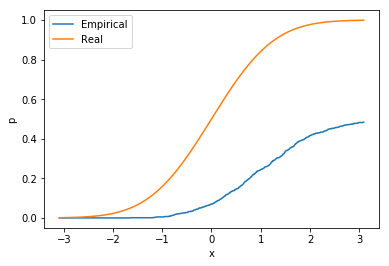

In [6]:
data = pd.read_csv('dataset1.txt', header=None)
data = np.array(sorted(list(data[0])))

y_emp = get_empirical_data(data, xs)
compare_data(xs, y_emp, y_real)

### Normal distribution sample

D = 0.019019951445360617
Reject? - No


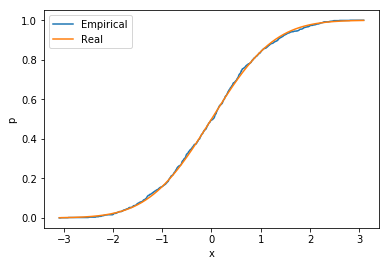

In [7]:
rnd = st.norm()
data = np.sort(rnd.rvs(size=xs.shape[0]))
y_emp = get_empirical_data(data, xs)
compare_data(xs, y_emp, y_real)

### Double exponintial sample

D = 0.04384982360297251
Reject? - Yes


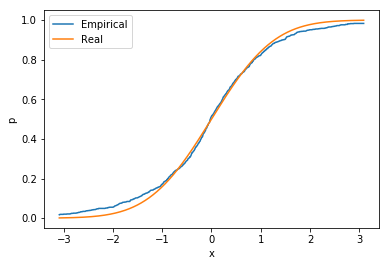

In [8]:
rnd = st.laplace()
data = np.sort(rnd.rvs(size=xs.shape[0]))
y_emp = get_empirical_data(data, xs)
compare_data(xs, y_emp, y_real)

### t-distributed (df = 3) sample

D = 0.06678368365604948
Reject? - Yes


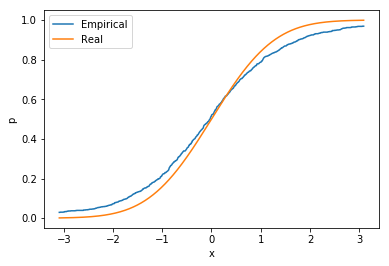

In [9]:
rnd = st.t(df=3)
data = np.sort(rnd.rvs(size=xs.shape[0]))
y_emp = get_empirical_data(data, xs)
compare_data(xs, y_emp, y_real)

### Sample from lognorm distribution with $\sigma=1$

D = 0.5294610804306507
Reject? - Yes


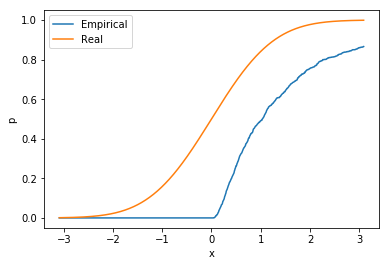

In [10]:
rnd = st.lognorm(s=1.)
data = np.sort(rnd.rvs(size=xs.shape[0]))
y_emp = get_empirical_data(data, xs)
compare_data(xs, y_emp, y_real)